In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

# PRS dataset
dataset = pd.read_pickle('PRS_dataset.pkl')
dataset.head()

,Is_anxiety,446,447,448,449,450,451,452,453,454,...,848,849,850,851,852,853,854,855,856,857
1000023,0,0.000507,0.00242,-0.000185,-0.000145,-0.000371,-0.000873,0.012805,0.000115,0.000151,...,0.025738,-0.001572,0.014031,-0.000354,-0.000001,0.000654,-0.002815,-0.000183,0.01424,-0.00352
1000030,1,0.000276,0.001576,0.000038,-0.000381,-0.000399,-0.004763,0.014032,0.000109,0.000093,...,0.014733,-0.000623,0.005552,-0.000244,0.00031,-0.00019,0.000197,-0.00005,0.01234,-0.00579
1000041,0,0.000649,-0.000098,-0.000086,0.00009,-0.000678,-0.004804,0.00727,-0.000024,0.000109,...,0.011649,-0.000921,0.010997,-0.000557,0.000115,-0.000354,-0.01137,-0.000419,0.006975,-0.004178
1000059,0,0.000585,0.000814,-0.000066,-0.000621,0.000105,0.00187,0.002563,0.000106,0.000097,...,0.022186,-0.000923,0.01562,-0.000159,0.000229,-0.000769,0.006247,-0.000164,0.001851,-0.001964
1000062,0,0.000214,0.00149,0.000117,-0.000153,-0.000603,-0.005913,0.012513,0.000089,0.000109,...,0.022118,-0.000425,0.007184,0.000349,0.000295,0.001721,0.011161,-0.0002,0.010253,-0.006825


In [2]:
covariate = pd.read_csv('ukb_covariates.txt', sep=' ')
covariate['FID'] = covariate['FID'].astype(str)
covariate.set_index(["FID"], inplace=True)
covariate = covariate.drop(['IID'], axis=1)
covariate.head()

,Age,Sex,BMI,Smoking,TDI,Alcohol_drinking,Ethnic,Diabetes,Cancer,COPD,...,Genetic_PCA5,Genetic_PCA6,Genetic_PCA7,Genetic_PCA8,Genetic_PCA9,Genetic_PCA10,Cluster_CR,dQC,Cardiovascular_disease,Gastrointestinal.abdominal
FID,,,,,,,,,,,,,,,,,,,,,
1000023,62.0,1,28.5536,1.0,-3.75639,2.0,0.0,0.0,0.0,NaN,...,-6.49179,-0.609969,-1.165700,-0.098069,0.495975,-2.358430,98.107,0.98,1,0
1000030,52.0,1,22.5895,0.0,-2.76977,2.0,1.0,0.0,0.0,0.0,...,10.82330,-1.107510,-1.226490,0.769962,3.961780,-5.506830,99.799,0.98,0,1
1000041,45.0,0,22.8840,1.0,-3.61921,2.0,1.0,0.0,0.0,NaN,...,-4.57321,-1.426250,-0.466132,-2.437160,2.756570,3.234860,99.877,0.97,0,1
1000059,48.0,0,27.4383,1.0,-3.48893,2.0,0.0,0.0,0.0,0.0,...,-6.19924,16.488200,-26.434900,27.148400,-2.781910,-3.974630,98.621,0.96,1,0
1000062,51.0,0,27.1430,0.0,0.81420,2.0,1.0,0.0,0.0,NaN,...,10.56850,-1.179770,-1.731450,2.832480,5.105820,0.190833,99.002,0.96,0,0


In [3]:
dataset = dataset.fillna(0)
covariate = covariate.fillna(0)

# check index between two dataframes
print(list(dataset.index) == list(covariate.index))

True


In [ ]:
# fetch P-values of normal linear regression of each gut micro
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
import json
import math
from tqdm import tqdm

pvalue_dict = {}
for gut_idx in tqdm(range(446, 858)): # 446, 858
    # concat xi and covariate
    xnew = pd.concat([dataset[str(gut_idx)], covariate], axis=1)
    y = dataset['Is_anxiety']
    # train LR model
    X2 = sm.add_constant(xnew)
    est = sm.OLS(y, X2).fit()
    pvalue = est.pvalues[str(gut_idx)]
    pvalue_dict[str(gut_idx)] = -math.log10(pvalue)

print(pvalue_dict)
with open('pvalues-log10.json','w+') as out:
    json.dump(pvalue_dict, out, indent=2)

100%|██████████| 412/412 [09:00<00:00,  1.31s/it]

{'446': 1.2566922671000837, '447': 1.5624948625160127, '448': 0.5963557322721666, '449': 1.4096700785076697, '450': 1.256559397852319, '451': 0.2711024687049481, '452': 0.5546072813052731, '453': 0.3855410605654427, '454': 0.6305308522413292, '455': 0.5193447552992098, '456': 0.7053688825430391, '457': 0.20164883205732165, '458': 2.188830659199448, '459': 2.3812910562125844, '460': 1.1783442679185243, '461': 1.267034596671236, '462': 0.735803681186832, '463': 0.17693417285743024, '464': 0.342424715162013, '465': 2.6646033894862007, '466': 0.12403300223498095, '467': 0.7048113391927158, '468': 0.8674743411822866, '469': 0.6327213489864488, '470': 0.15290322094241598, '471': 0.23762768973990345, '472': 1.5692406006794661, '473': 0.5996537762744503, '474': 2.5424232049319815, '475': 0.20387287270602222, '476': 0.6314848181571922, '477': 0.6423174936158585, '478': 0.057495175471413175, '479': 0.5254537950320577, '480': 1.4394501848790802, '481': 0.3698522591777693, '482': 0.646534237503802

In [5]:
import math
-math.log10(0.05)

1.3010299956639813

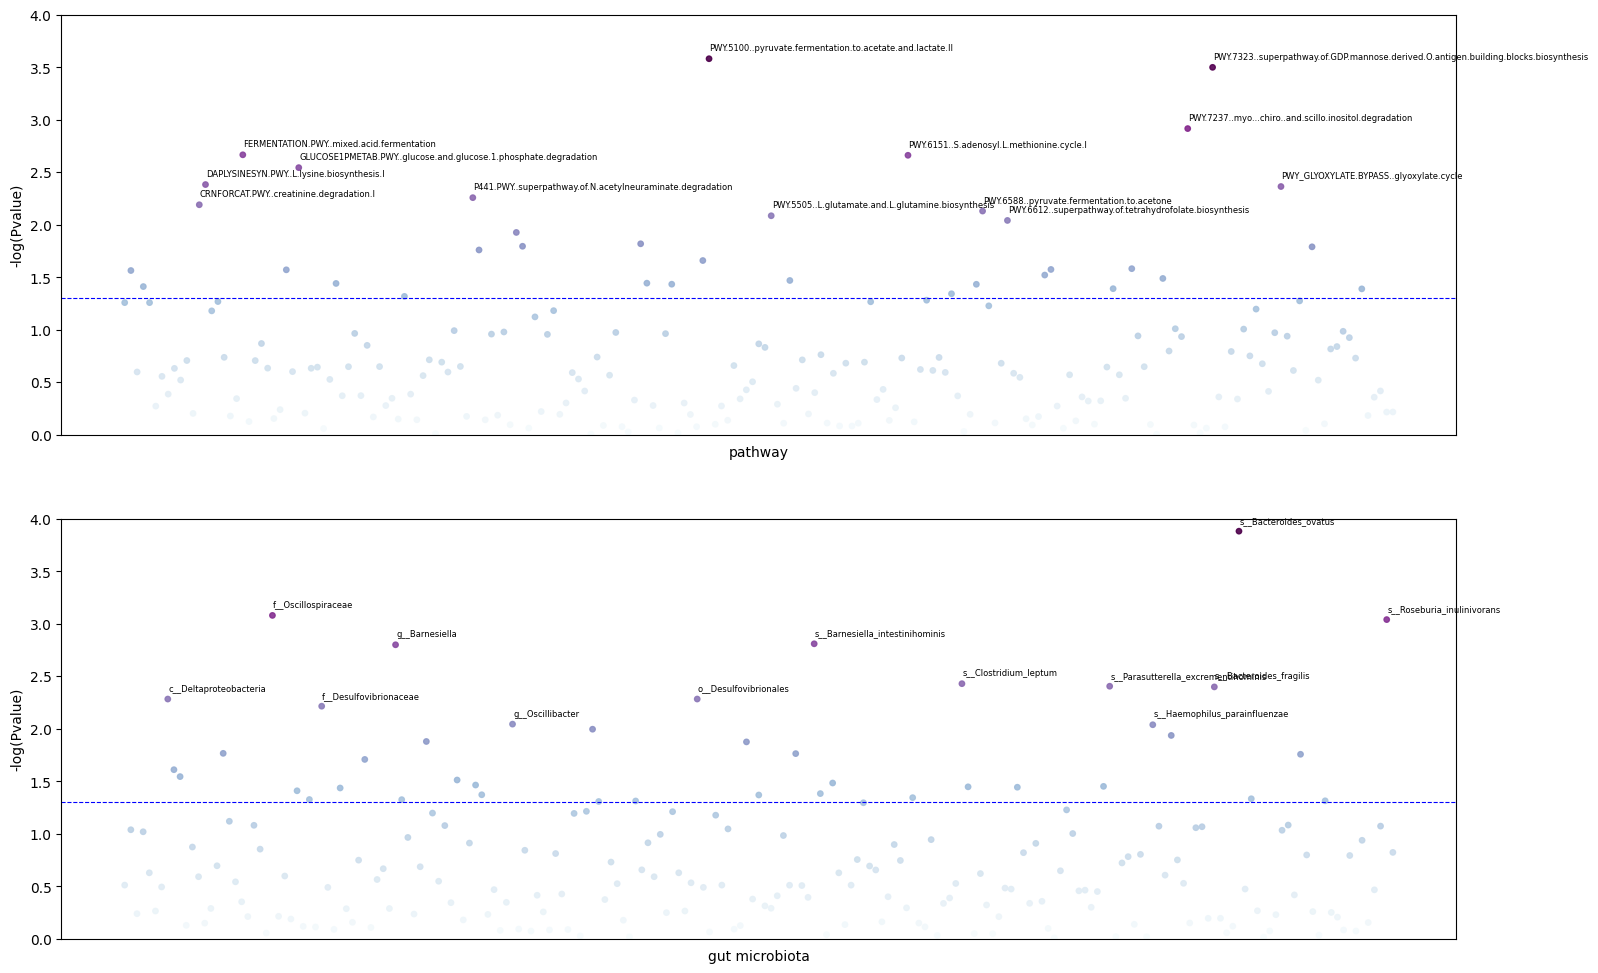

In [6]:
# Scatter plot for P-values
import json
import matplotlib.pyplot as plt
with open('pvalues-log10.json', 'r') as inp:
    pvalue_dict = json.load(inp)

# load DMPCohort names
name_dict = {}
DMP_names = pd.read_csv('DMPCohort-names.csv', sep=',')
for idx in range(DMP_names.shape[0]):
    #DMP_names['number'][idx] = DMP_names['number'][idx][-3:]
    name_dict[DMP_names['number'][idx][-3:]] = DMP_names['name'][idx]

# prepare for data and label
x = list(range(446-446, 858-446))
y = list(pvalue_dict.values())
labels = list(name_dict.values())

# split data for pathway and gut microbiota
x_pathway, y_pathway, labels_pathway = x[0:205], y[0:205], labels[0:205]
x_gut, y_gut, labels_gut = x[205:], y[205:], labels[205:]

# scatter plot
plt.figure(figsize=(18, 12))

# scatter plot for pathway
plt.subplot(2, 1, 1)
plt.axhline(y=1.3, color='b', linestyle='--', linewidth=0.8)
plt.scatter(x_pathway, y_pathway, alpha=0.9, c=y_pathway, s=15, cmap='BuPu')
plt.xticks([])
plt.ylim((0, 4))
plt.xlabel('pathway')
plt.ylabel('-log(Pvalue)')
# annotate
for i in range(len(x_pathway)):
    if(y_pathway[i] > 2):
        plt.annotate(labels_pathway[i], xy = (x_pathway[i], y_pathway[i]), xytext = (x_pathway[i]+0.08, y_pathway[i]+0.08), size=6)

# scatter plot for gut microbiota
plt.subplot(2, 1, 2)
plt.axhline(y=1.3, color='b', linestyle='--', linewidth=0.8)
plt.scatter(x_gut, y_gut, alpha=0.9, c=y_gut, s=15, cmap='BuPu')
plt.xticks([])
plt.ylim((0, 4))
plt.xlabel('gut microbiota')
plt.ylabel('-log(Pvalue)')
# annotate
for i in range(len(x_gut)):
    if(y_gut[i] > 2):
        plt.annotate(labels_gut[i].split('.')[-1], xy = (x_gut[i], y_gut[i]), xytext = (x_gut[i]+0.08, y_gut[i]+0.08), size=6)

plt.show()

In [ ]:
# LASSO regression for feature selection
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV

# prepare dataset
xnew = dataset[list(dataset)[1:]]
y = dataset['Is_anxiety']

# find the best alpha
lassocv = LassoCV()
lassocv.fit(xnew, y)
print("best lamda: ", lassocv.alpha_)

coeff_used = np.sum(lassocv.coef_!=0)
print ("number of features used: ", coeff_used) #9
'''
# best lamda
lasso=Lasso(alpha=lassocv.alpha_,normalize=True)
lasso.fit(xnew, y)
'''
# print corvs
pd.set_option('display.max_rows', None)
pd.options.display.float_format = '{:.32f}'.format
corvs = pd.DataFrame(index=['Intercept']+xnew.columns.tolist(), data=[lassocv.intercept_]+lassocv.coef_.tolist(), columns=['corv'])
#corvs = corvs.abs()
#corvs.sort_values("corv",inplace=True)
corvs_drop = corvs.drop(corvs[corvs['corv'] == 0].index)
print(corvs_drop)


best lamda:  7.617182400456966e-06
number of features used:  9
                                         corv
Intercept  0.09046481537827541496987748814718
510       -0.04037929245707835151923958960651
529       -0.02144089646011524546986848349661
588       -0.11524258234675481549214026699701
605       -0.01005563926113974340670331741876
610        0.05903914246309627938957831361222
672       -0.03108068206002492783746049553883
702        0.02589670254176370742249524425915
805        0.02055216367346832107010357049148
856        0.13353384290275546741888490487327


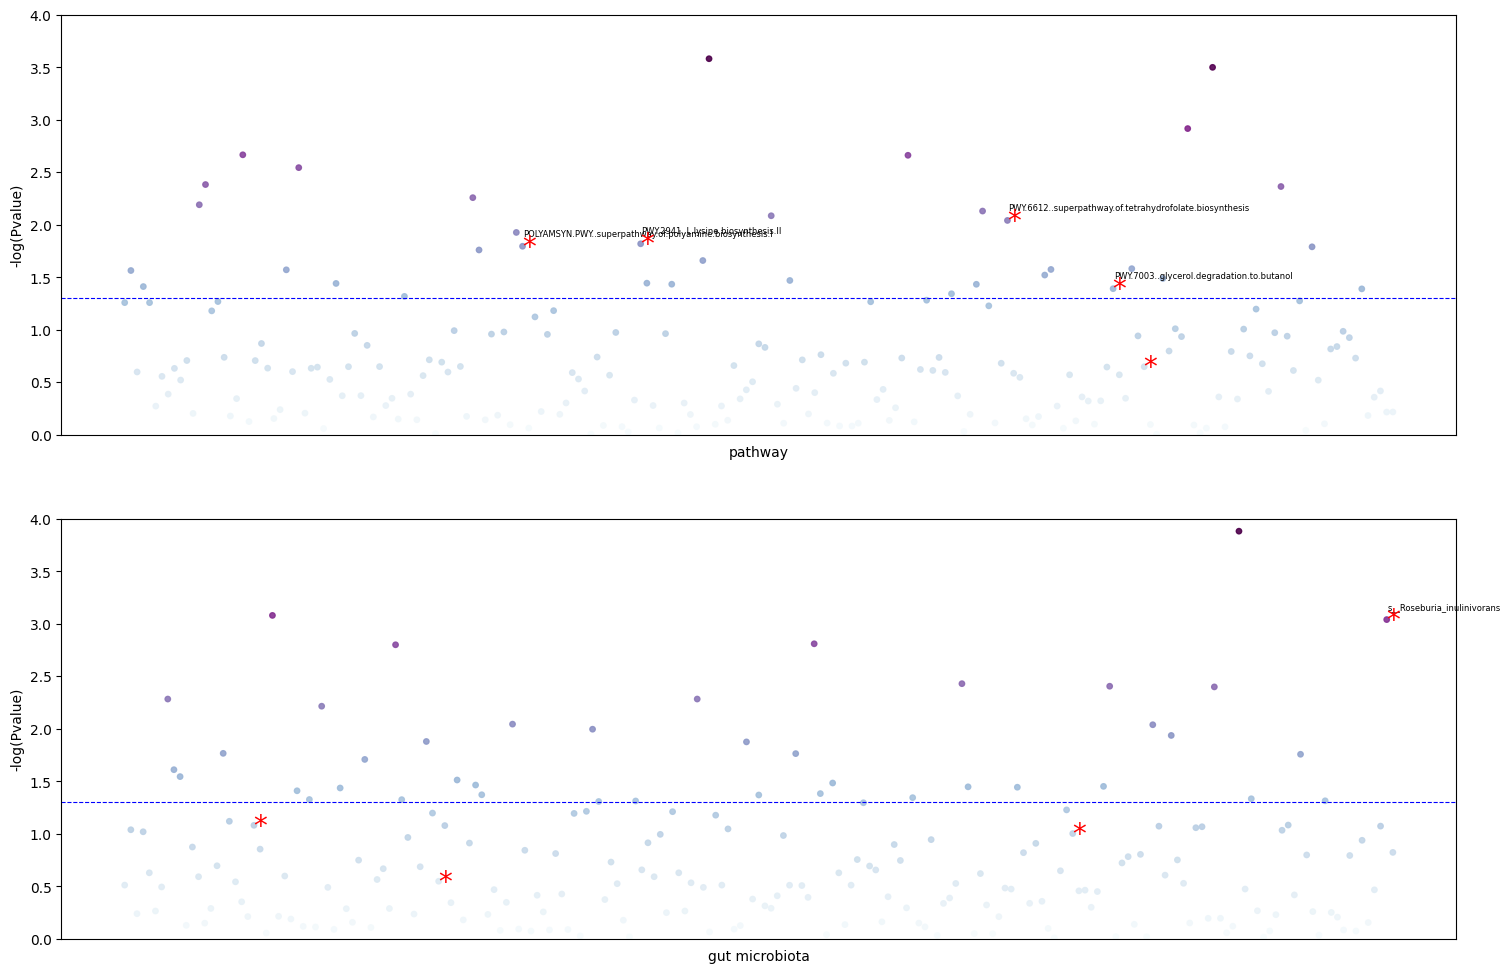

In [ ]:
# annotate LASSO result to scatter plot
corvs_feature = corvs.drop(index = ['Intercept'])
corvs_list = list(corvs_feature['corv'])
corvs_pathway, corvs_gut = corvs_list[0:205], corvs_list[205:]

# scatter plot
plt.figure(figsize=(18, 12))

# scatter plot for pathway
plt.subplot(2, 1, 1)
plt.axhline(y=1.3, color='b', linestyle='--', linewidth=0.8)
plt.scatter(x_pathway, y_pathway, alpha=0.9, c=y_pathway, s=15, cmap='BuPu')
plt.xticks([])
plt.ylim((0, 4))
plt.xlabel('pathway')
plt.ylabel('-log(Pvalue)')
# annotate
for i in range(len(x_pathway)):
    if(y_pathway[i] >= 1.3 and corvs_pathway[i] != 0):
        plt.annotate(labels_pathway[i], xy = (x_pathway[i], y_pathway[i]), xytext = (x_pathway[i]+0.1, y_pathway[i]+0.1), size=6)
    if(corvs_pathway[i] != 0):
        plt.annotate('*', xy = (x_pathway[i], y_pathway[i]), xytext = (x_pathway[i]-0.08, y_pathway[i]-0.08), size=20,color='r')

# scatter plot for gut microbiota
plt.subplot(2, 1, 2)
plt.axhline(y=1.3, color='b', linestyle='--', linewidth=0.8)
plt.scatter(x_gut, y_gut, alpha=0.9, c=y_gut, s=15, cmap='BuPu')
plt.xticks([])
plt.ylim((0, 4))
plt.xlabel('gut microbiota')
plt.ylabel('-log(Pvalue)')
# annotate
for i in range(len(x_gut)):
    if(y_gut[i] > 1.3 and corvs_gut[i] != 0):
        plt.annotate(labels_gut[i].split('.')[-1], xy = (x_gut[i], y_gut[i]), xytext = (x_gut[i]+0.1, y_gut[i]+0.1), size=6)
    if(corvs_gut[i] != 0):
        plt.annotate('*', xy = (x_gut[i], y_gut[i]), xytext = (x_gut[i]-0.08, y_gut[i]-0.08), size=20,color='r')

plt.show()

In [9]:
# choose another lamda
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV

# prepare dataset
xnew = dataset[list(dataset)[1:]]
y = dataset['Is_anxiety']


# best lamda : 7.617182400456966e-06
lasso=Lasso(alpha=0.000005)
lasso.fit(xnew, y)

coeff_used = np.sum(lasso.coef_!=0)
print ("number of features used: ", coeff_used) #9

# print corvs
pd.set_option('display.max_rows', None)
pd.options.display.float_format = '{:.32f}'.format
corvs = pd.DataFrame(index=['Intercept']+xnew.columns.tolist(), data=[lasso.intercept_]+lasso.coef_.tolist(), columns=['corv'])
#corvs = corvs.abs()
#corvs.sort_values("corv",inplace=True)
corvs_drop = corvs.drop(corvs[corvs['corv'] == 0].index)
print(corvs_drop)


number of features used:  22
                                         corv
Intercept  0.08833758409433439817703970220464
452        0.00038866160343456983413887306789
458        0.03352284539869160306935214066471
480        0.02742510137842447265343892581768
487       -0.02152188861034510722336499100038
510       -0.06482384846086512719676164806515
529       -0.07330262344551244368950904117810
566        0.00408178208449401155877289681939
588       -0.13804415841246625573646156226459
605       -0.05771590415236807491972115258250
610        0.06588780156928937536964241417081
624       -0.01985513444304514221738777735027
627        0.01512026320916342453370972975790
672       -0.05055547204231101987570440314812
691       -0.01329766245730135132419036381179
702        0.03237415904471672989384245511246
703        0.00704782424340681928204288553275
705       -0.04619342665031064831815399429615
782        0.04651970855886756323060993167928
805        0.06428237737424097320015903278545
834  

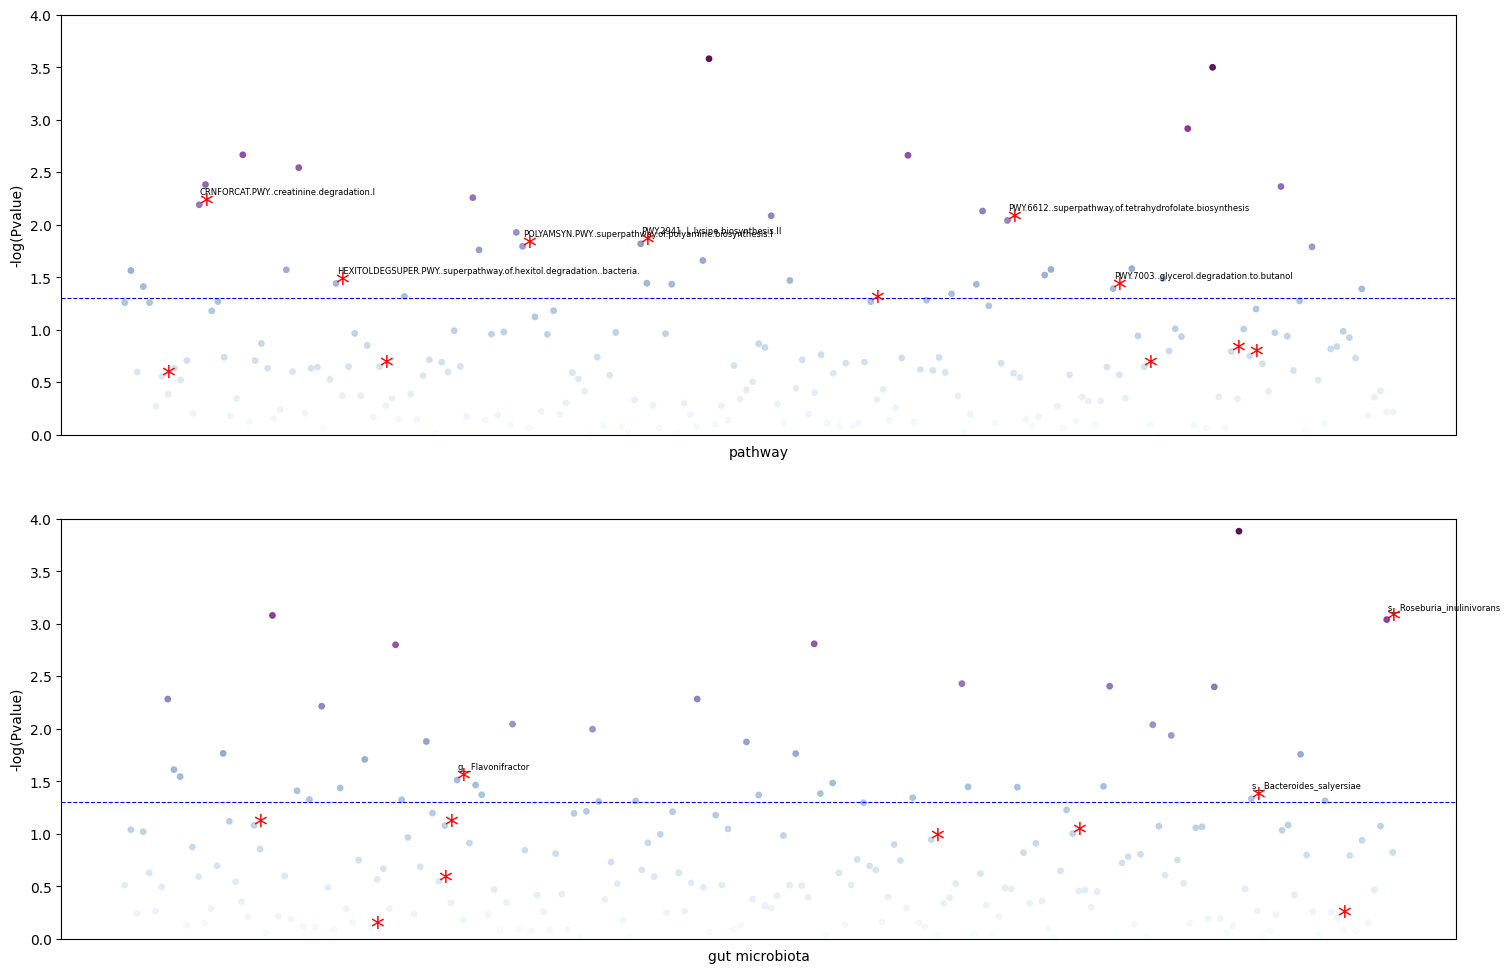

In [10]:
# annotate LASSO result to scatter plot
corvs_feature = corvs.drop(index = ['Intercept'])
corvs_list = list(corvs_feature['corv'])
corvs_pathway, corvs_gut = corvs_list[0:205], corvs_list[205:]

# scatter plot
plt.figure(figsize=(18, 12))

# scatter plot for pathway
plt.subplot(2, 1, 1)
plt.axhline(y=1.3, color='b', linestyle='--', linewidth=0.8)
plt.scatter(x_pathway, y_pathway, alpha=0.9, c=y_pathway, s=15, cmap='BuPu')
plt.xticks([])
plt.ylim((0, 4))
plt.xlabel('pathway')
plt.ylabel('-log(Pvalue)')
# annotate
for i in range(len(x_pathway)):
    if(y_pathway[i] >= 1.3 and corvs_pathway[i] != 0):
        plt.annotate(labels_pathway[i], xy = (x_pathway[i], y_pathway[i]), xytext = (x_pathway[i]+0.1, y_pathway[i]+0.1), size=6)
    if(corvs_pathway[i] != 0):
        plt.annotate('*', xy = (x_pathway[i], y_pathway[i]), xytext = (x_pathway[i]-0.08, y_pathway[i]-0.08), size=20,color='r')

# scatter plot for gut microbiota
plt.subplot(2, 1, 2)
plt.axhline(y=1.3, color='b', linestyle='--', linewidth=0.8)
plt.scatter(x_gut, y_gut, alpha=0.9, c=y_gut, s=15, cmap='BuPu')
plt.xticks([])
plt.ylim((0, 4))
plt.xlabel('gut microbiota')
plt.ylabel('-log(Pvalue)')
# annotate
for i in range(len(x_gut)):
    if(y_gut[i] > 1.3 and corvs_gut[i] != 0):
        plt.annotate(labels_gut[i].split('.')[-1], xy = (x_gut[i], y_gut[i]), xytext = (x_gut[i]+0.1, y_gut[i]+0.1), size=6)
    if(corvs_gut[i] != 0):
        plt.annotate('*', xy = (x_gut[i], y_gut[i]), xytext = (x_gut[i]-0.08, y_gut[i]-0.08), size=20,color='r')

plt.show()